<a href="https://colab.research.google.com/github/tbonne/BLO/blob/master/notebooks/lm_OLS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='http://drive.google.com/uc?export=view&id=1VwLYFU_RpimHn-ApqqcH95EVIe00-UTE' width=500>

#<font color='darkorange'>Estimating the best fit line using OLS</font>

In this notebook we'll learn how to use ordinary least squares (OLS) to fit a line to data. To do this we'll use a linear regression function called **lm()**. This function will fit the linear equation to the data and give us the estimes of each parameter (a and b).


y = a + b*x

In this equation we have variables (the data we are going to use: e.g., the columns in a spreadsheet).

> Here the "y" is the values of the response variable. This is the thing you'd like to predict! So in the case of the IQ dataset this could be child IQ values.
  
> The "x" in the equation is the values you'd like to use to help make those predictions. Again in the case of the IQ dataset this could be the mom's IQ score.

In this equation we also have parameters (these are learnt from the data)
  
> The "a" is the intercept, and measures where the linear line crosses the y-axis on the plot.

> The "b" is the slope, and measures how the x value is predicted to change the y value. Positive slopes suggest that when x goes up so does y, and negative slopes suggest that when x goes up y goes down.

  
  

Now that we've looked at all the peices of the equation let's try to use it! This will help us better understand what variables we should use as inputs and what the parameters really mean. To do this let's try and fit a line to the data!

## Fitting a line using OLS

First lets load in some packages. These have functions that other people have made, and will hopefully make our lives a lot easier!

In [1]:
install.packages("jtools")
install.packages("ggstance")
library(jtools)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘pander’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘plyr’




Then let's load in the IQ data

In [2]:
#here we will read in a csv file and place it into something called df
df_IQ <- read.csv("https://raw.githubusercontent.com/tbonne/IntroPychStats/main/data/kidIQ.csv", header = T)

#let's take a look at the data
df_IQ

kid_score,mom_hs,mom_iq,mom_work,mom_age
<int>,<int>,<dbl>,<int>,<int>
65,1,121.11753,4,27
98,1,89.36188,4,25
85,1,115.44316,4,27
83,1,99.44964,3,25
115,1,92.74571,4,27
98,0,107.90184,1,18
69,1,138.89311,4,20
106,1,125.14512,3,23
102,1,81.61953,1,24


Then let's plot the scatterplot. Here we will choose: 
> what we'd like to predict (child IQ) and put it on the y-axis.
> What we'd like to use to help make those predictions (mom IQ) and put it on the x-axis.

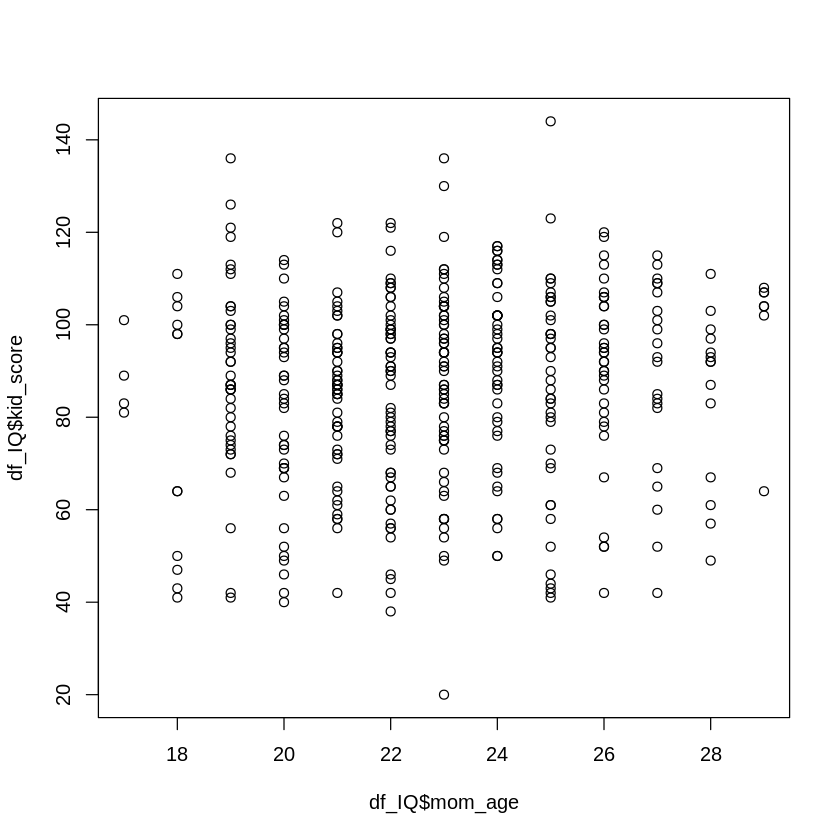

In [3]:
plot(x=df_IQ$mom_age,y=df_IQ$kid_score) 

Rather than visually fitting the line let's use OLS to find the values of the best fit line for us! To do this we'll use the function call **lm()**, which stands for linear model (lm). We'll use this function a lot in the next few classes so there will be a lot of time to figure all this out, so don't worry if this seems like a lot at the momment.

The **lm()** function needs us to tell it what kind of linear equation to use. In particular it needs to know what you'd like to predict and what you'd like to use to make those predictions. To do this it uses a specific input to make it easier for use:
> What you want to predict ~ what you want to use to make those predictions

It also requires us to use the names of the variables in the data (i.e., the column names):
  
> e.g., kid_score ~ mom_iq
  
The **lm()** function also requires us to input the data.
> e.g., data = df_IQ

So when we put this all together we get the following:
  

In [4]:
#fit a linear model
model_childIQ <- lm(kid_score ~ mom_iq, data=df_IQ)


This bit of code then use our inputs to find the best fit linear equation for :
> kid_score = a + b * mom_iq

Let's take a look at what it found. To do this we'll use a function called **summary()**. It is very useful and will tell us what values of a and b it found for the best fit line. 
> Note: it will also tell us lot's of other information! It might be a little overwhelming, but we'll go through each part in this class and the next few classes. So there is no need to know what all the outputs mean right now!

In [5]:
#What does the best fit model look like?
summ(model_childIQ)

MODEL INFO:
Observations: 434
Dependent Variable: kid_score
Type: OLS linear regression 

MODEL FIT:
F(1,432) = 108.64, p = 0.00
R² = 0.20
Adj. R² = 0.20 

Standard errors: OLS
------------------------------------------------
                     Est.   S.E.   t val.      p
----------------- ------- ------ -------- ------
(Intercept)         25.80   5.92     4.36   0.00
mom_iq               0.61   0.06    10.42   0.00
------------------------------------------------

There is a lot going on with the output above. Right now and for the majority of the class we will focus on only a small portion of the output. In particular, the most important part is the Estimates of the coefficients.
> The (Intercept) estimate above is just the *a* in the linear equation. This is the value at which the line crosses the y-axis.
> the mom_iq estimate is just the *b* in the linear equation. This is the slope of the line. We can see here that it is estimated to be positive, and that for every 1 increase in IQ for the mom, the model estimates that the child's IQ is 0.61 higher too.

The other important thing to take away from this output is the Std Error. This is the standard error of the estimate. As we are using a sample we know there is some uncertainty in our estimates (i.e., they won't match the estimates if we had all the IQ values for all the mom's and their children). This Std Error is our estimate of how much uncertainty we have in each of these parameters.

Let's use the uncertainty to estimate a confidence interval for each parameter.

In [6]:
summ(model_childIQ, confint = TRUE)

MODEL INFO:
Observations: 434
Dependent Variable: kid_score
Type: OLS linear regression 

MODEL FIT:
F(1,432) = 108.64, p = 0.00
R² = 0.20
Adj. R² = 0.20 

Standard errors: OLS
---------------------------------------------------------
                     Est.    2.5%   97.5%   t val.      p
----------------- ------- ------- ------- -------- ------
(Intercept)         25.80   14.17   37.43     4.36   0.00
mom_iq               0.61    0.49    0.72    10.42   0.00
---------------------------------------------------------

We can see from this output that the model is pretty certain that the slope of the population is somewhere between 0.49 and 0.72. 
> Those are the range of population values that are compatible with our sample!
> I.e., it is unlikely that we'd get a sample like the one we got if the real slope between moms and chilren was -0.3.

Let's take a look at this a little more visually

Registered S3 methods overwritten by 'broom':
  method            from  
  tidy.glht         jtools
  tidy.summary.glht jtools

Loading required namespace: broom.mixed



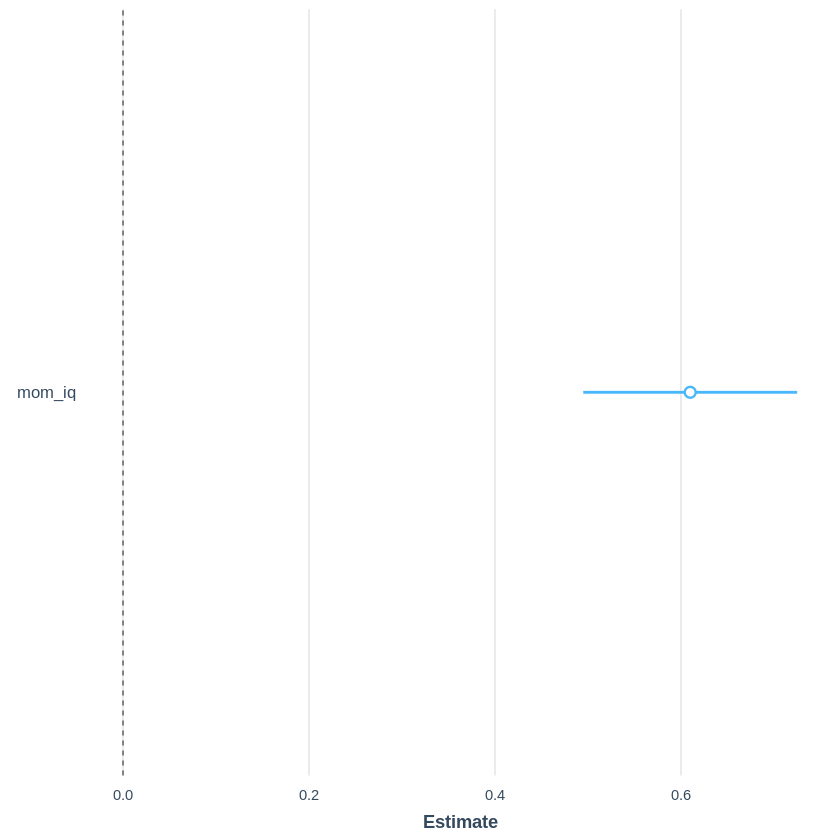

In [7]:
plot_summs(model_childIQ)

## Try it out!

Now that we've worked our way through fitting and interpreting a linear equation, try and repeat the anlysis below but this time see if the age of the mother at birth rather than the IQ of the mom can predict a childs IQ score.

Fit this a new model that tries to predict child IQ using mother's age when the child was born.
  
> Feel free to copy and paste, and then modify the formula as needed.

In [ ]:
#fit a linear model


Next take a look at the summary table. 
> Try estimating confidence intervals to help you interpret the results.

In [ ]:
#take a look at the summary table


Now use the results to try and answer the following questions:

> What is the slope of the best fit line?
  
> What does this slope suggest about the pattern between a child's IQ and the age of the mom when the child was born?
  
> How does the 95% CI help you interpret that slope?
